....Import Successful
....Dataframe is Ready
The mean flow for the last 7 days is: 158.71
The mean flow for the last 14 days is: 154.0


One-week Beginning and End Flow Values
158.0
162.0


Two-week Beginning and End Flow Values
145.0
162.0


Overall flow fluctuation in past 7 days was 2.53 percent.
Overall flow fluctuation in past 14 days was 11.72 percent.


Figure 4. Two-week flow trend


C:\Users\gilli\miniconda3\envs\hastools\lib\site-packages\numpy\core\fromnumeric.py:3370: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


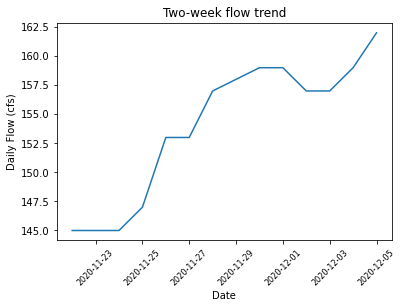

The one-week flow prediction is 162.7 cfs
The two-week flow prediction is 165.0 cfs


In [1]:
# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("....Import Successful")

# Replace parts of url with variables
site = '09506000'
start = '1989-01-01'
end = '2020-12-05'  # Update end date each week to Saturday

url = "https://waterdata.usgs.gov/nwis/dv?cb_00060=on&format=rdb&site_no=" + \
       site + "&referred_module=sw&period=&begin_date=" + start + "&end_date=" + \
       end
data = pd.read_table(url, skiprows=30, names=['agency_cd', 'site_no',
                                              'datetime', 'flow', 'code'],
                     parse_dates=['datetime'])

# Expand the dates to year month day
data['year'] = pd.DatetimeIndex(data['datetime']).year
data['month'] = pd.DatetimeIndex(data['datetime']).month
data['day'] = pd.DatetimeIndex(data['datetime']).day

print("....Dataframe is Ready")

# Look at tables of statistics for last 7 and 14 days
data_weekly = data.tail(7)
data_two_wks = data.tail(14)

# Get one-week and two-week mean values
mean_1wk = round(np.mean(data_weekly)["flow"], 2)
print("The mean flow for the last 7 days is:", mean_1wk)

mean_2wk = round(np.mean(data_two_wks)["flow"], 2)
print("The mean flow for the last 14 days is:", mean_2wk)

# Get beginning and end flow values for one-week and two-week periods
print("\n")
print("One-week Beginning and End Flow Values")
first_val1 = data_weekly.flow.iloc[0]
last_val1 = data_weekly.flow.iloc[-1]
print(first_val1)
print(last_val1)

print("\n")
print("Two-week Beginning and End Flow Values")
first_val2 = data_two_wks.flow.iloc[0]
last_val2 = data_two_wks.flow.iloc[-1]
print(first_val2)
print(last_val2)

# Overall flow flucuation for last 7 and 14 days
# Calculate flucuation from start to end of last 7 days
perc_chng_total_1wk = ((last_val1 - first_val1)/first_val1)*100
print("\n")
print("Overall flow fluctuation in past 7 days was",
      round(perc_chng_total_1wk, 2), "percent.")

# Calculate flucuation from start to end of last 14 days
perc_chng_total_2wk = ((last_val2 - first_val2)/first_val2)*100
print("Overall flow fluctuation in past 14 days was",
      round(perc_chng_total_2wk, 2), "percent.")

# Look at visual trend over last two weeks
fig, ax = plt.subplots()
ax.plot(data_two_wks.datetime, data_two_wks.flow)
ax.set(title="Two-week flow trend")
ax.set(xlabel='Date', ylabel='Daily Flow (cfs)')
ax.tick_params(axis='x', labelcolor="black", labelsize=8, rotation=45)
print("\n")
print("Figure 4. Two-week flow trend")
plt.show()

# Trend-based prediction for one-week and two-week forecast values 
# Based on percent change total from above code block.  If trend is upward,forecast a percentage higher, 
# if trend is downward, forecast a percentage lower.  Averaging percent change for the 2 week to reduce effect 
# of lag in trend change recognition.

Jill_1wk = mean_1wk + (mean_1wk * (perc_chng_total_1wk/100))
print("The one-week flow prediction is", round(Jill_1wk, 1), "cfs")

Jill_2wk = mean_2wk + (mean_2wk * (((perc_chng_total_2wk+perc_chng_total_1wk)/2)/100))
print("The two-week flow prediction is", round(Jill_2wk, 1), "cfs")

# %%    